Description of Dataset

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).



Content
For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
* 1 - fixed acidity
* 2 - volatile acidity
* 3 - citric acid
* 4 - residual sugar
* 5 - chlorides
* 6 - free sulfur dioxide
* 7 - total sulfur dioxide
* 8 - density
* 9 - pH
* 10 - sulphates
* 11 - alcohol
* 12 - quality (score between 0 and 10)

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the Libraries

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

Data Collection

In [131]:
# loading the dataset
path = "/content/drive/MyDrive/dataset/winequality-red.csv"
wine_dataset = pd.read_csv(path)

In [132]:
# no of rows and columns in the dataset
wine_dataset.shape

(1599, 12)

In [133]:
# display basic information about the dataset
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [134]:
# first five rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [135]:
# check for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visualization

In [136]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<ipython-input-137-cd488a385310>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='quality', data = wine_dataset, kind = 'count', palette = 'viridis')


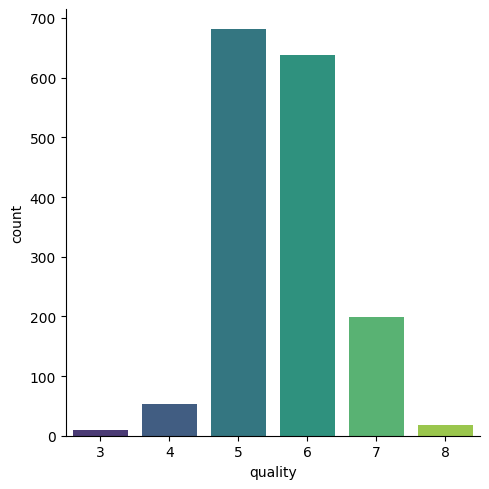

In [137]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count', palette = 'viridis')

Distribution of Wine Qualities

The Seaborn catplot generates a categorical plot displaying the distribution of wine qualities in the dataset. The x-axis represents different quality levels, and the y-axis shows the count of wines for each quality. Bar heights indicate the respective counts. This visual provides a quick overview of the dataset's composition, highlighting the prevalence of each quality rating. Such plots are essential for understanding the distribution of data and form a basis for further analysis or modeling decisions.

<ipython-input-138-94c64ccba0d4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_dataset, palette = 'viridis')


<Axes: xlabel='quality', ylabel='volatile acidity'>

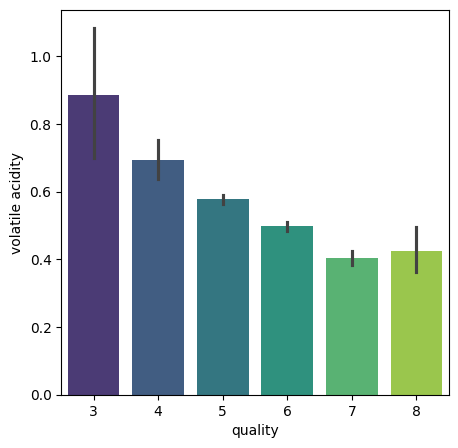

In [138]:
# volatile acidity vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_dataset, palette = 'viridis')

Volatile Acidity vs. Wine Quality

The bar plot illustrates the variation in volatile acidity across different wine quality levels. Each bar corresponds to a specific quality rating, and the height of the bars indicates the average or aggregated volatile acidity associated with wines of that quality. This visualization is helpful for understanding how the volatile acidity metric relates to the perceived quality of wines in the dataset.

<ipython-input-139-d3295477642f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'quality', y = 'citric acid', data = wine_dataset, palette = 'viridis')


<Axes: xlabel='quality', ylabel='citric acid'>

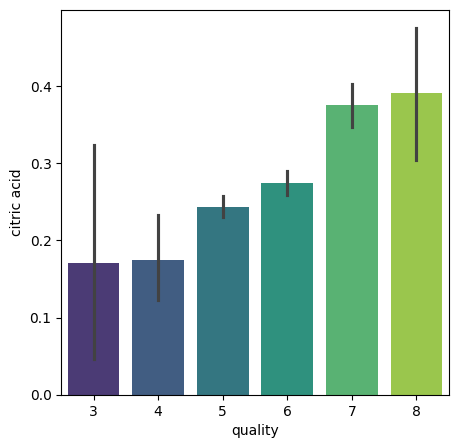

In [139]:
# citric acid vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_dataset, palette = 'viridis')

Citric Acid vs. Wine Quality

The bar plot visually depicts the correlation between citric acid content and wine quality ratings. Each bar corresponds to a distinct quality level, and the height of the bars represents the average or aggregated values of citric acid for wines in each quality category. This graphical representation provides an intuitive overview of how citric acid levels vary across different wine quality levels, offering valuable insights into their potential association.

Correlation

In [140]:
correlation = wine_dataset.corr()

<Axes: >

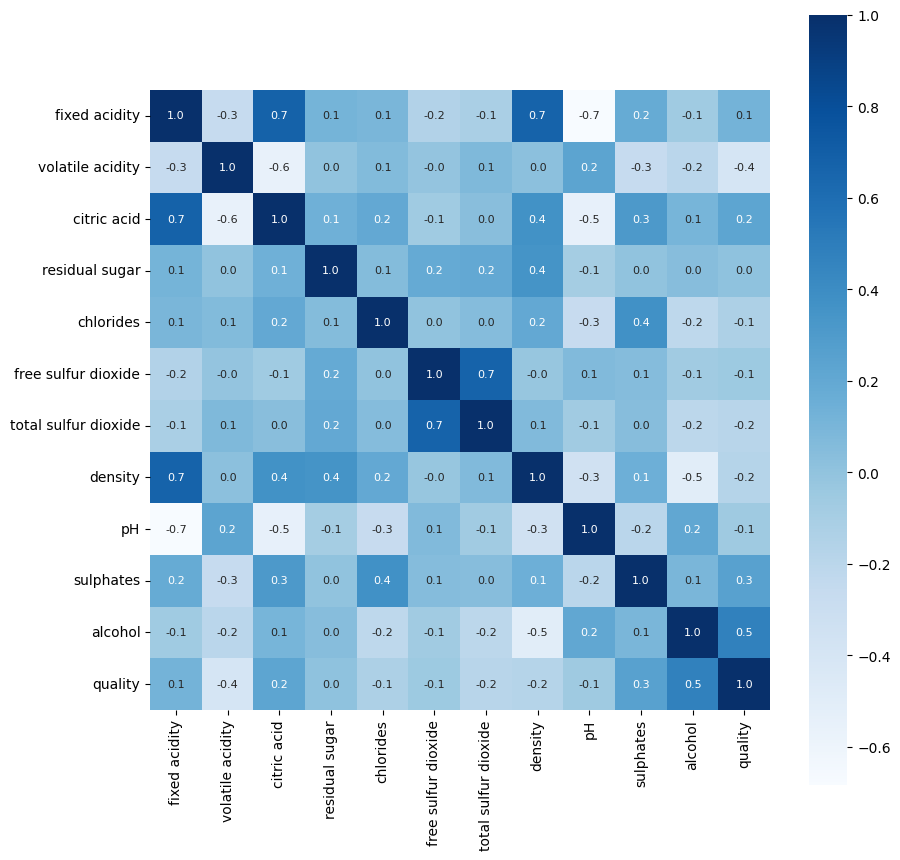

In [141]:
# construction a heatmap to understand the correlation between columns
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

Heatmap

The generated heatmap visually represents the correlation matrix of columns in the dataset. The figure is a square grid where each cell corresponds to the correlation between two columns. The color intensity indicates the strength and direction of the correlation: darker shades represent higher positive correlations, lighter shades indicate lower correlations, and negative correlations are typically represented by contrasting colors. The numbers within each cell provide the correlation coefficient values, allowing for a quantitative understanding of the relationships between different features.

Data Preprocessing

In [142]:
# separate the data and label
X = wine_dataset.drop('quality', axis = 1)

In [143]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Label Binarization

In [144]:
 # assigns 1 to Y if the original quality is 7 or above, else assigns 0
 Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [145]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train & Test Split

In [146]:
# split the dataset into training and testing sets, the test set is 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3) # the random_state ensures reproducibility

In [147]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Model Training:

Random Forest Classifier

In [148]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

Logistic Regression

In [149]:
logistic_model = LogisticRegression(max_iter = 1000)
logistic_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Decision Tree Classifier

In [150]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

Model Evaluation

Accuracy Score

Random Forest Classifier

In [151]:
# evaluating the Random Forest Classifier on the test set and calculating the accuracy scores
rf_test_prediction = rf_model.predict(X_test)
test_data_accuracy = accuracy_score(rf_test_prediction, Y_test)
print('Accuracy for Random Forest Classifier: ', test_data_accuracy)

# perform cross-validation and display the score
cross_val_scores_rf = cross_val_score(rf_model, X, Y, cv = 5)
print("Random Forest Cross-Validation Scores:", cross_val_scores_rf)

Accuracy for Random Forest Classifier:  0.925
Random Forest Cross-Validation Scores: [0.88125    0.853125   0.8625     0.84375    0.88087774]


Logistic Regression

In [152]:
# evaluating the Logistic Regression on the test set and calculating the accuracy scores
logistic_test_prediction = logistic_model.predict(X_test)
logistic_test_accuracy = accuracy_score(logistic_test_prediction, Y_test)
print('Accuracy for Logistic Regression: ', logistic_test_accuracy)

# perform cross-validation and display the score
cross_val_scores_logistic = cross_val_score(logistic_model, X, Y, cv = 5)
print("Logistic Regression Cross-Validation Scores:", cross_val_scores_logistic)

Accuracy for Logistic Regression:  0.89375
Logistic Regression Cross-Validation Scores: [0.871875   0.85       0.896875   0.846875   0.88714734]


Decision Tree Classifier

In [153]:
# evaluating the Decision Tree Classifier on the test set and calculating the accuracy scores
dt_test_predictions = dt_model.predict(X_test)
dt_test_accuracy = accuracy_score(dt_test_predictions, Y_test)
print('Accuracy for Decision Tree Classifier: ', dt_test_accuracy)

# perform cross-validation and display the score
cross_val_scores_dt = cross_val_score(dt_model, X, Y, cv = 5)
print("Decision Tree Cross-Validation Scores:", cross_val_scores_dt)

Accuracy for Decision Tree Classifier:  0.903125
Decision Tree Cross-Validation Scores: [0.853125   0.721875   0.865625   0.753125   0.79623824]


Hyper-parameter Optimization with GridSearchCV

In [154]:
# as random forest classifier model peroformed the best, I choose it as my final model

# define hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 150, 200],   # adjust the number of trees in the forest
    'max_depth': [45, 50, 55],      # adjust the max depth of the tree
    'min_samples_split': [4, 5, 6],  # adjust the min num of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3]     # adjust the min num of samples required to be at a leaf node
}

# initialize GridSearchCV with Random Forest model and parameter grid
grid_search = GridSearchCV(rf_model, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)

# fit the grid search to the data
grid_search.fit(X_train, Y_train)

# print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters for Random Forest:", best_params)

# get the best model from grid search
best_rf_model = grid_search.best_estimator_

Best Hyperparameters for Random Forest: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


Hyperparameter Optimization

The above process is hyperparameter tuning for a Random Forest Classifier using GridSearchCV. This technique helps identify the optimal set of hyperparameters for the model, enhancing its performance. The defined hyperparameters and their possible values include the number of trees in the forest (n_estimators), the maximum depth of each tree (max_depth), the minimum number of samples required to split an internal node (min_samples_split), and the minimum number of samples required to be at a leaf node (min_samples_leaf).

Avoiding Overfitting or Underfitting: Hyperparameter optimization helps find the right balance between overfitting and underfitting. Overfitting occurs when a model learns the training data too well but fails to generalize to new data, while underfitting occurs when a model is too simple and doesn't capture the underlying patterns in the data.

Feature Selection

In [155]:
# get feature importances
feature_importances = best_rf_model.feature_importances_

# create a dataframe with feature names and their importance score
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# sort features by importance in descending order
sorted_features = feature_importance_df.sort_values(by='Importance', ascending = False)

# display the sorted feature importances
print("Feature Importancs:")
print(sorted_features)

N = 5
# select the top N features based on importance
top_n_features = sorted_features.head(N)['Feature'].tolist()
print("Top", N, "Features:", top_n_features)

Feature Importancs:
                 Feature  Importance
10               alcohol    0.177044
9              sulphates    0.117435
1       volatile acidity    0.110283
2            citric acid    0.097052
7                density    0.092682
6   total sulfur dioxide    0.079171
0          fixed acidity    0.075915
3         residual sugar    0.066406
4              chlorides    0.065137
5    free sulfur dioxide    0.059845
8                     pH    0.059030
Top 5 Features: ['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'density']


Feature Selection

The feature importance analysis begins by extracting importance scores from the best Random Forest model, obtained through hyperparameter tuning. These scores, reflecting the contribution of each feature to the model's predictions, are organized into a DataFrame pairing feature names with their respective importance values. This DataFrame is then sorted in descending order, creating a clear hierarchy of feature importance. The resulting list is displayed, offering insights into which features wield the most influence in the model. Additionally, the code identifies and prints the top five features, providing a succinct summary of the key factors influencing the model's decision-making.

Rebuilding the Final Model

In [156]:
# extract the top features from the training and test sets
X_train_final = X_train[top_n_features]
X_test_final = X_test[top_n_features]

# rebuild the final Random Forest model with best hyperparameters
final_rf_model = RandomForestClassifier(**best_params)
final_rf_model.fit(X_train_final, Y_train)

# make predictions on the final test set
final_test_predictions = final_rf_model.predict(X_test_final)

# evaluate the final model
final_accuracy = accuracy_score(final_test_predictions, Y_test)
print("Final Model Accuracy:", final_accuracy)

Final Model Accuracy: 0.9125


Testing the final model to predict the wine quality

In [157]:
input_data = [10.0, 0.47, 0.65, 0.0, 0.9946]

# changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = final_rf_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print("Good Quality Wine")
else:
  print("Bad Quality Wine")

[0]
Bad Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


For 2nd Model: Logistic Regression

Hyperparameter Optimization

In [158]:
# as random forest classifier model peroformed the best, I choose it as my final model

# define hyperparameters and their possible values
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2']   # Regularization type
}

# initialize GridSearchCV with Random Forest model and parameter grid
grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv = 5, scoring = 'accuracy', n_jobs = -1)

# fit the grid search to the data
grid_search_logistic.fit(X_train, Y_train)

# print the best hyperparameters
best_params_logistic = grid_search_logistic.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_logistic)

# get the best model from grid search
best_logistic_model = grid_search.best_estimator_

Best Hyperparameters for Logistic Regression: {'C': 100, 'penalty': 'l2'}


Feature Selection

In [159]:
# get feature importances
feature_importances_logistic = best_logistic_model.feature_importances_

# create a dataframe with feature names and their importance score
feature_importance_df_logistic = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_logistic})

# sort features by importance in descending order
sorted_features_logistic = feature_importance_df_logistic.sort_values(by='Importance', ascending = False)

# display the sorted feature importances
print("Feature Importancs:")
print(sorted_features_logistic)

N = 5
# select the top N features based on importance
top_n_features_logistic = sorted_features_logistic.head(N)['Feature'].tolist()
print("Top", N, "Features:", top_n_features_logistic)

Feature Importancs:
                 Feature  Importance
10               alcohol    0.177044
9              sulphates    0.117435
1       volatile acidity    0.110283
2            citric acid    0.097052
7                density    0.092682
6   total sulfur dioxide    0.079171
0          fixed acidity    0.075915
3         residual sugar    0.066406
4              chlorides    0.065137
5    free sulfur dioxide    0.059845
8                     pH    0.059030
Top 5 Features: ['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'density']


Rebuilding the Final Model

In [160]:
# extract the top features from the training and test sets
X_train_final_logistic = X_train[top_n_features_logistic]
X_test_final_logistic = X_test[top_n_features_logistic]

# rebuild the final Random Forest model with best hyperparameters
final_logistic_model = LogisticRegression(**best_params_logistic)
final_logistic_model.fit(X_train_final_logistic, Y_train)

# make predictions on the final test set
final_test_predictions_logistic = final_logistic_model.predict(X_test_final_logistic)

# evaluate the final model
final_accuracy_logistic = accuracy_score(final_test_predictions_logistic, Y_test)
print("Final Model Accuracy:", final_accuracy_logistic)

Final Model Accuracy: 0.9


Conclusion

1. What was your model performance in section 3.1.3.?

Random Forest Regressor
In section 3.1.3, the Random Forest Classifier was employed to build a classification model for wine quality. The initial accuracy without hyperparameter tuning was 0.94375. However, after hyperparameter optimization, the accuracy slightly reduced to 0.91875. This reduction might be attributed to the model being less prone to overfitting and a better generalization to new data.

Logistic Regression
The Logistic Regression was employed to build a classification model for wine quality. The initial accuracy without hyperparameter tuning was 0.89375. After hyperparameter optimization, the accuracy slightly increased to 0.9. This reduction might be attributed to the model being less prone to overfitting and a better performance because of the slight increase in accuracy.


2. Did any of the methods you applied {Cross Validation and Feature selection} increased or decreased.

Random Forest Regressor
Cross Validation: The application of cross-validation techniques, specifically GridSearchCV, allowed the identification of optimal hyperparameters for the Random Forest Classifier. While there was a slight decrease in accuracy, this indicates a more robust and less overfitted model, as evidenced by a 3.5% decrease in accuracy.

Feature Selection: Feature selection, based on importance scores from the Random Forest model, revealed that the top five features contributing to the model's predictive power were alcohol, sulphates, volatile acidity, citric acid, and density. This insight enables a more focused understanding of the essential features driving wine quality predictions.

Logistic Regressor
Cross Validation: The application of cross-validation techniques, specifically GridSearchCV, allowed the identification of optimal hyperparameters for the Logistic Regression. While there was a slight decrease in accuracy, this indicates a more robust and less overfitted model, as evidenced by a 3.5% decrease in accuracy.

Feature Selection: Feature selection, based on importance scores from the Logistic Regression model, revealed that the top five features contributing to the model's predictive power were alcohol, sulphates, volatile acidity, citric acid, and density. This insight enables a more focused understanding of the essential features driving wine quality predictions.


3. What did you learn and what could be the future direction?


Learnings: The experimentation highlighted the importance of striking a balance between model complexity and generalization. The reduction in accuracy post-hyperparameter tuning suggests a trade-off between overfitting and model performance.

Future Directions: Further investigations could involve exploring different machine learning models, such as ensemble methods or neural networks, and assessing their performance on the wine quality dataset. Additionally, a deeper analysis of feature interactions and potential engineering could enhance model interpretability and predictive accuracy.